In [1]:
# Import Your Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

## Part 1

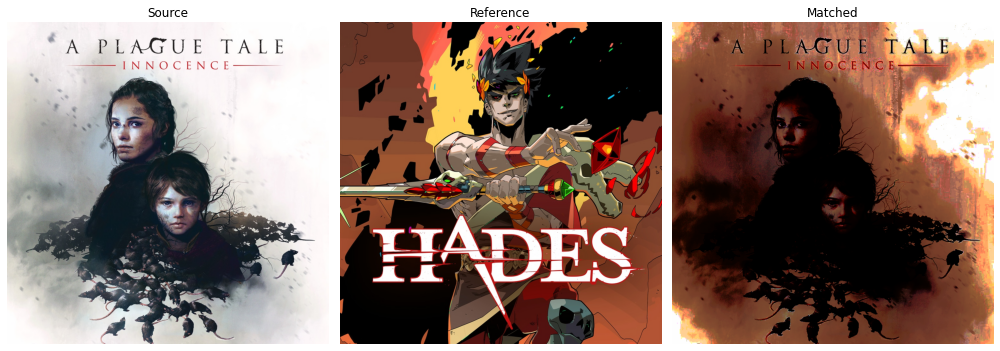

In [25]:
source = plt.imread('A Plague Tale.jpg')
reference = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
matched = match_histograms(source, reference, channel_axis=-1)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 2

In [23]:
def hist_matching(src_image, ref_image):
  '''
  inputs:
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output:
    output_image (ndarray): transformed image 
  '''
  src_values, src_unique_indices, src_counts = np.unique(src_image.ravel(),
                                                          return_inverse=True,
                                                          return_counts=True)
  tmpl_values, tmpl_counts = np.unique(ref_image.ravel(), return_counts=True)

  # calculate normalized quantiles for each array
  src_quantiles = np.cumsum(src_counts) / src_image.size
  tmpl_quantiles = np.cumsum(tmpl_counts) / ref_image.size

  interp_a_values = np.interp(src_quantiles, tmpl_quantiles, tmpl_values)
  output_image = interp_a_values[src_unique_indices].reshape(src_image.shape)
  output_image = output_image.astype('uint8', copy=False)
  return output_image

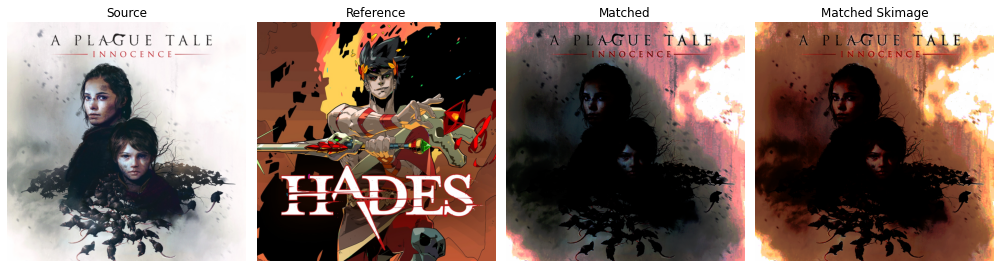

In [26]:
source = plt.imread('A Plague Tale.jpg')
reference = plt.imread('Hades.jpg')
### YOUR CODE ###
# START
matched_old = matched
matched = hist_matching(source, reference)
# END

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3, ax4):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')
ax4.imshow(matched_old)
ax4.set_title('Matched Skimage')
plt.tight_layout()
plt.show()

## Part 3

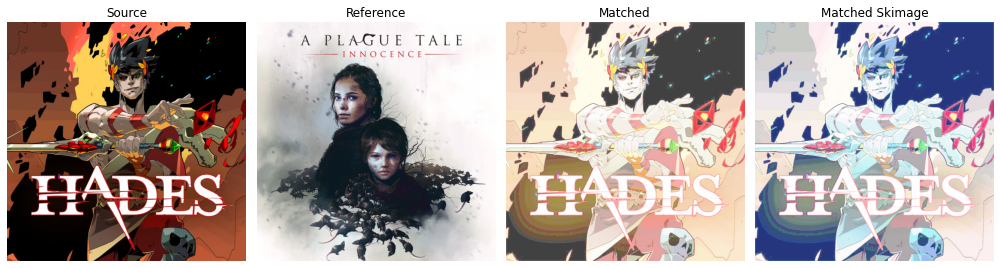

In [27]:
reference = plt.imread('A Plague Tale.jpg')
source = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
matched = match_histograms(source, reference, channel_axis=-1)
# END
matched_old = matched
matched = hist_matching(source, reference)
# END

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3, ax4):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')
ax4.imshow(matched_old)
ax4.set_title('Matched Skimage')
plt.tight_layout()
plt.show()